### 차원 축소
##### PCA
- PCA는 데이터를 가장 잘 설명할 수 있는, 데이터의 분산을 최대화하는 방향으로 축 결정

PCA, LDA
![PCA-LDA](https://d.pr/i/hI0WaD+)

- LDA의 class 내 데이터가 정규분포를 따름. class 내에선 분산 최소화. class 간 분산 최대화.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target']=iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


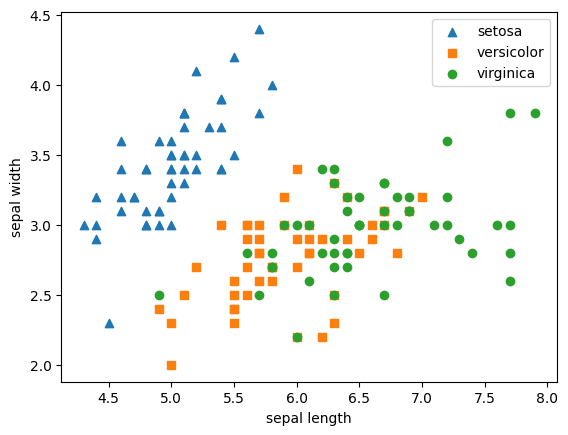

In [3]:
# 특성 선택을 통한 시각화 (시각화를 위해 두 특성만 사용)
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal length (cm)']
    y = iris_df[iris_df['target']==i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    plt.legend()
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')

plt.show()

In [8]:
# PCA 주성분 분석 (4개의 특성을 2개로 줄일 것)
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2차원으로 축소

X=iris_df.iloc[:, :-1] # -5부터 -2까지 가져옴. feature 데이터

# 차원 축소
pca.fit(X) # 해당 특성들의 특징을 제일 잘 설명해주는 축을 찾아줌
iris_pca = pca.transform(X)

iris_df.shape, iris_pca.shape
# 2차원 배열 형태. 칼럼 두 개.

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2']) # dataframe형으로 변환
iris_pca_df['target'] = iris_data.target

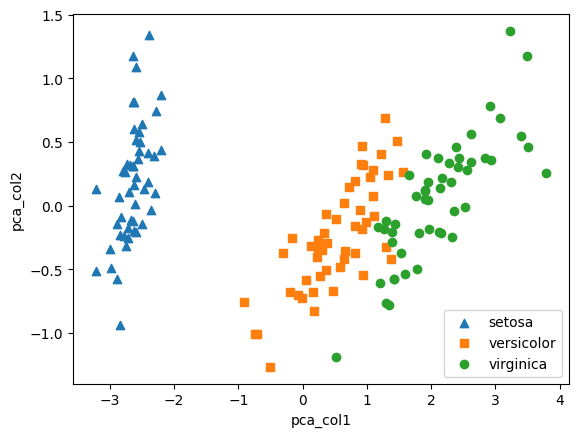

In [ ]:
# PCA 후 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target']==i]['pca_col1']
    y = iris_pca_df[iris_pca_df['target']==i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    plt.legend()
    plt.xlabel('pca_col1')
    plt.ylabel('pca_col2')

plt.show()
# 같은 class의 data는 몰려있고, class간 영역이 비교적 명확해짐

In [ ]:
pca.explained_variance_ratio_
# 계산된 주성분이 실제 데이터 총 분산에서 얼마만큼 나타내는지 비율로 반환
# 첫 번째 주성분은 92퍼로 분산 설명. 두 번째 주성분은 5퍼 정도 분산 설명.

array([0.92461872, 0.05306648])

In [ ]:
# 원본 데이터 학습 및 평가. 로지스틱 회귀 사용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5)
# 교차 검증 수행 후 그 결과값만 반환함. 검증할 대상 모델, 검증할 대상 데이터, 검증 다섯 번 반복 (train_set을 5등분)
scores
# [0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]: 반복할 때마다 성능 평가로 나온 값

print('원본 데이터 평가:', np.mean(scores))
# 0.9733333333333334

원본 데이터 평가: 0.9733333333333334


In [ ]:
# PCA 데이터 학습 및 평가

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_pca_df.iloc[:, :2], iris_pca_df['target'], cv=5)
# 교차 검증 수행 후 그 결과값만 반환함. 검증할 대상 모델, 검증할 대상 데이터, 검증 다섯 번 반복 (train_set을 5등분)

print('원본 데이터 평가:', np.mean(scores))
# 0.96 -> 평가 점수 차이 거의 x. 잘 반영되어 축소했다고 볼 수 있음

원본 데이터 평가: 0.96


##### PCA 과일 데이터
- 흑백 이미지 데이터. 픽셀값 범위 0~255

In [ ]:
fruits = np.load('./data/fruits_300.npy')
fruits # (300, 100, 100). 3차원 행렬. 100행 100열 데이터가 300개 있음. (300개의 이미지)

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [28]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr) # 이미지 데이터가 들어간 arr
    rows = int(np.ceil(N / 10)) # .ceil() 올림 처리
    cols = N if rows < 2 else 10 # rows=0또는1이면 N 그대로.
    # 이미지 출력할 subplot 행, 열 위치. 10개씩 출력되도록 함

    fig, ax = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    # squeeze=False: 2차원 형태를 유지할 수 있게끔 하는 속성

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N: # 마지막 개수 제한 조건문
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
                # imshow: 이미지 보여주는 메서드
                # gray_r: gray_ reverse. 흰 바탕. 0(흑색)~255(백색)으로 색 표출
            ax[i, j].axis('off')
            # 축, 눈금 전체 등이 안 보이게 off함
    
    plt.show()

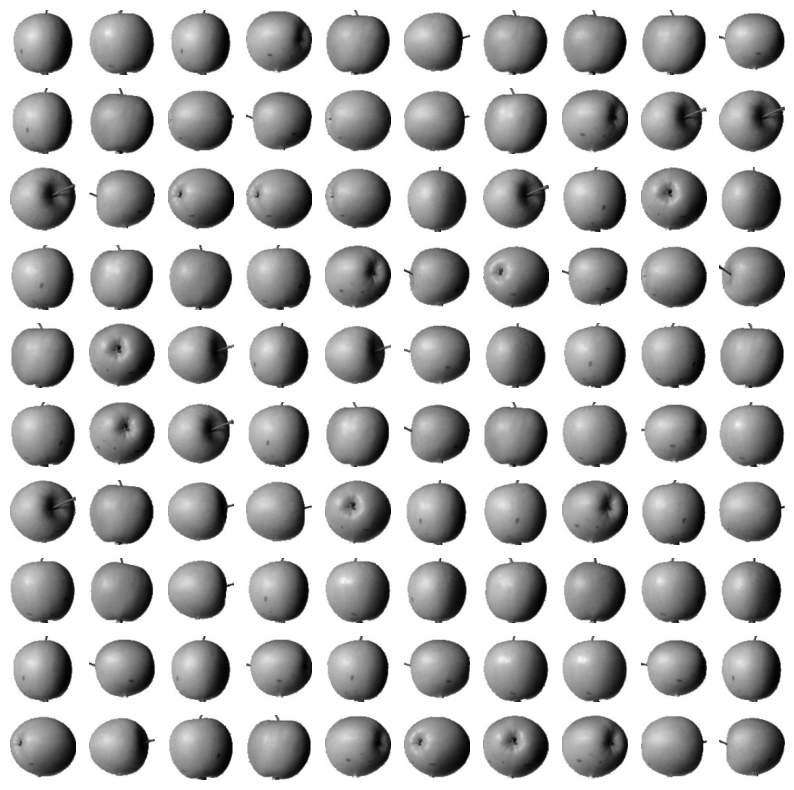

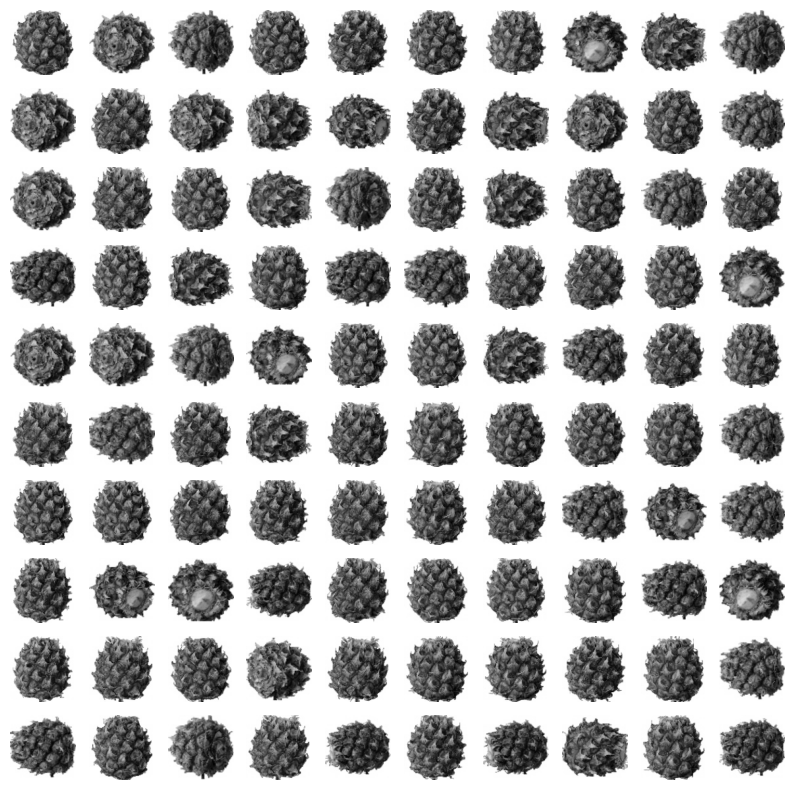

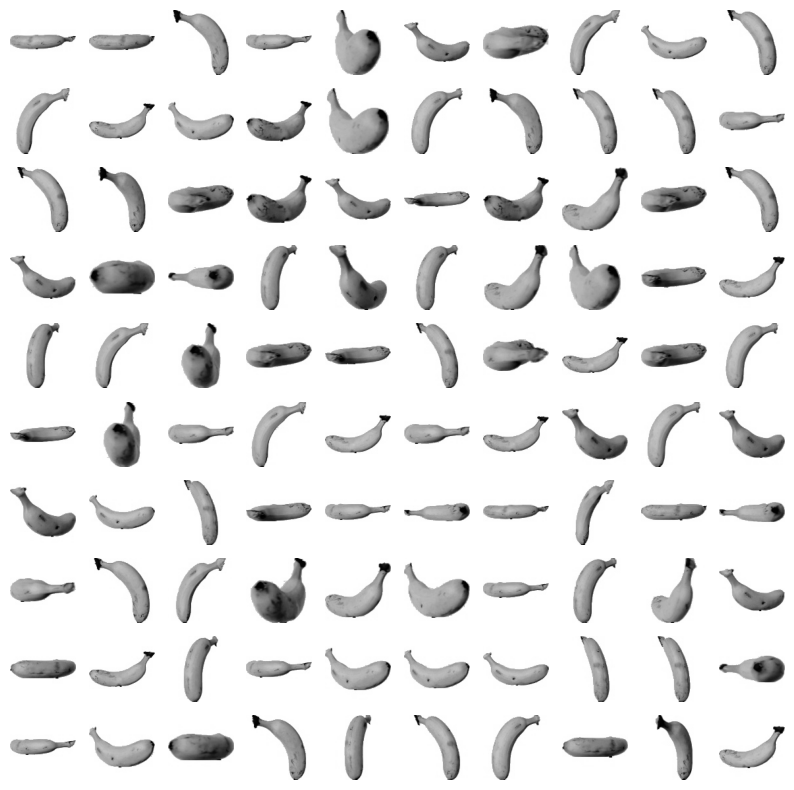

In [ ]:
draw_fruits(fruits[:100])       # 사과
draw_fruits(fruits[100:200])    # 파인애플
draw_fruits(fruits[200:])       # 바나나

In [ ]:
# 1차원 배열로 reshape할 것((100, 100)을 늘어뜨림)
# why? pca는 2차원 배열로 값을 받아 열(피쳐)의 축소를 진행하기 때문
fruits_1d = fruits.reshape(300, 100 * 100)
fruits_1d.shape

(300, 10000)

In [ ]:
# 10000칼럼을 50차원으로 차원 축소
pca = PCA(n_components=50)

fruits_pca = pca.fit_transform(fruits_1d)
fruits_pca.shape # (300, 50)

(300, 50)

In [ ]:
pca.components_.shape
# (50, 10000) pca 구현한 주성분 개수와 원본 데이터 특성 개수.

(50, 10000)

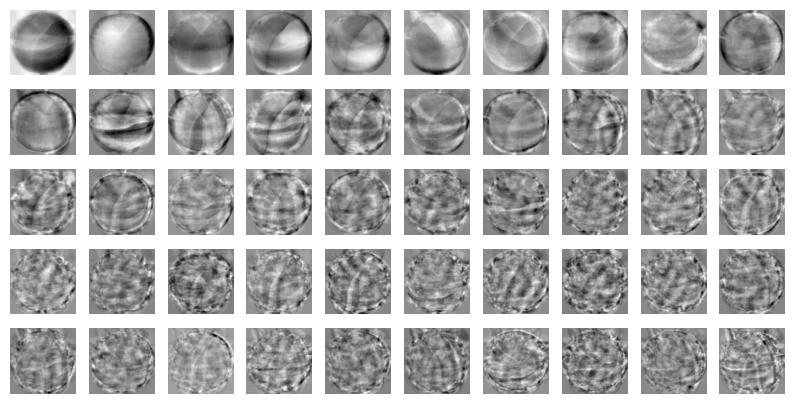

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 사과, 파인애플, 바나나가 걍 섞임...
# 이미지에 나타나는 주요 패턴부터 노이즈까지 차례로 출력됨을 볼 수 있음.

In [ ]:
# pca 데이터 파일 저장

np.save('./data/fruits_pca.npy', fruits_pca)
# 차원을 축소한 데이터 파일을 저장
# 약 3,000KB 파일 크기가 120KB 정도로 줄음

In [ ]:
# pca 데이터 파일 로드
fruits_pca = np.load('./data/fruits_pca.npy')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511201
 0.00486382 0.00480347 0.00447834 0.00437309 0.0040804  0.00389469
 0.0037244  0.00359282 0.00331474 0.00317775 0.00304302 0.00303744
 0.00288756 0.00275724 0.00264902 0.00255603 0.00252125 0.00247265
 0.00239659 0.00229726 0.00221817 0.00216521 0.00213401 0.0019651
 0.00192942 0.00190083 0.00185608 0.00182789 0.00173333 0.0016966
 0.00163966 0.00159065]
0.9215714865293321


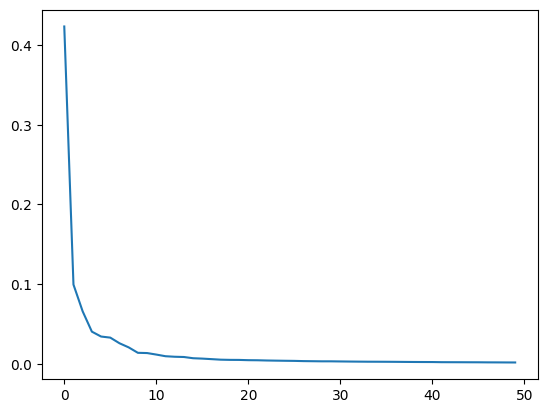

In [ ]:
print(pca.explained_variance_ratio_)
# 50개의 주성분에 대해, 실제 데이터를 어느 정도로 설명하고 있는지 그 비율을 출력

print(pca.explained_variance_ratio_.sum())
# 축소를 진행했으므로 원본 데이터를 100퍼센트 표현하기 어려운 것은 당연
# 0.1을 넘을 수 없는 건가? -> 주성분 데이터는 겹치는 특성이 없나?
# -> 주성분 도출을 모두 끝낸 후, 원본 데이터를 얼마만큼 설명하는지 전체에서 비율을 산출하므로 1이 나올 수 없음!

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [40]:
# 사과, 파인애플, 바나나로 다중 분류를 진행할 것

target = np.array([0]*100 + [1]*100 + [2]*100)
# 0: 사과    1: 파인애플    2: 바나나
# label 데이터 생성

In [45]:
# 원본 데이터로 교차 검증 시행
from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruits_1d, target, cv=3)
# 로지스틱 회귀 모델로 교차검증 시행. fit_time, score_time, test_Score(점수) 모두 나옴
result

{'fit_time': array([0.16376543, 0.14642763, 0.15354347]),
 'score_time': array([0.00303435, 0.00299883, 0.00299549]),
 'test_score': array([1.  , 1.  , 0.99])}

In [49]:
# PCA 데이터로 교차 검증 시행
result_pca = cross_validate(lr_clf, fruits_pca, target, cv=3)
result_pca
# 데이터 양이 작아졌으므로 fit_time, score_time이 확연히 줄어듦.
# test_score 거의 보존됨.

{'fit_time': array([0.01052284, 0.00597405, 0.00500154]),
 'score_time': array([0.        , 0.00099993, 0.00099945]),
 'test_score': array([1.  , 1.  , 0.99])}

In [50]:
fruits_inverse = pca.inverse_transform(fruits_pca)
# 해당 pca 데이터를 원본으로 데이터 복구 수행
fruits_inverse.shape

(300, 10000)

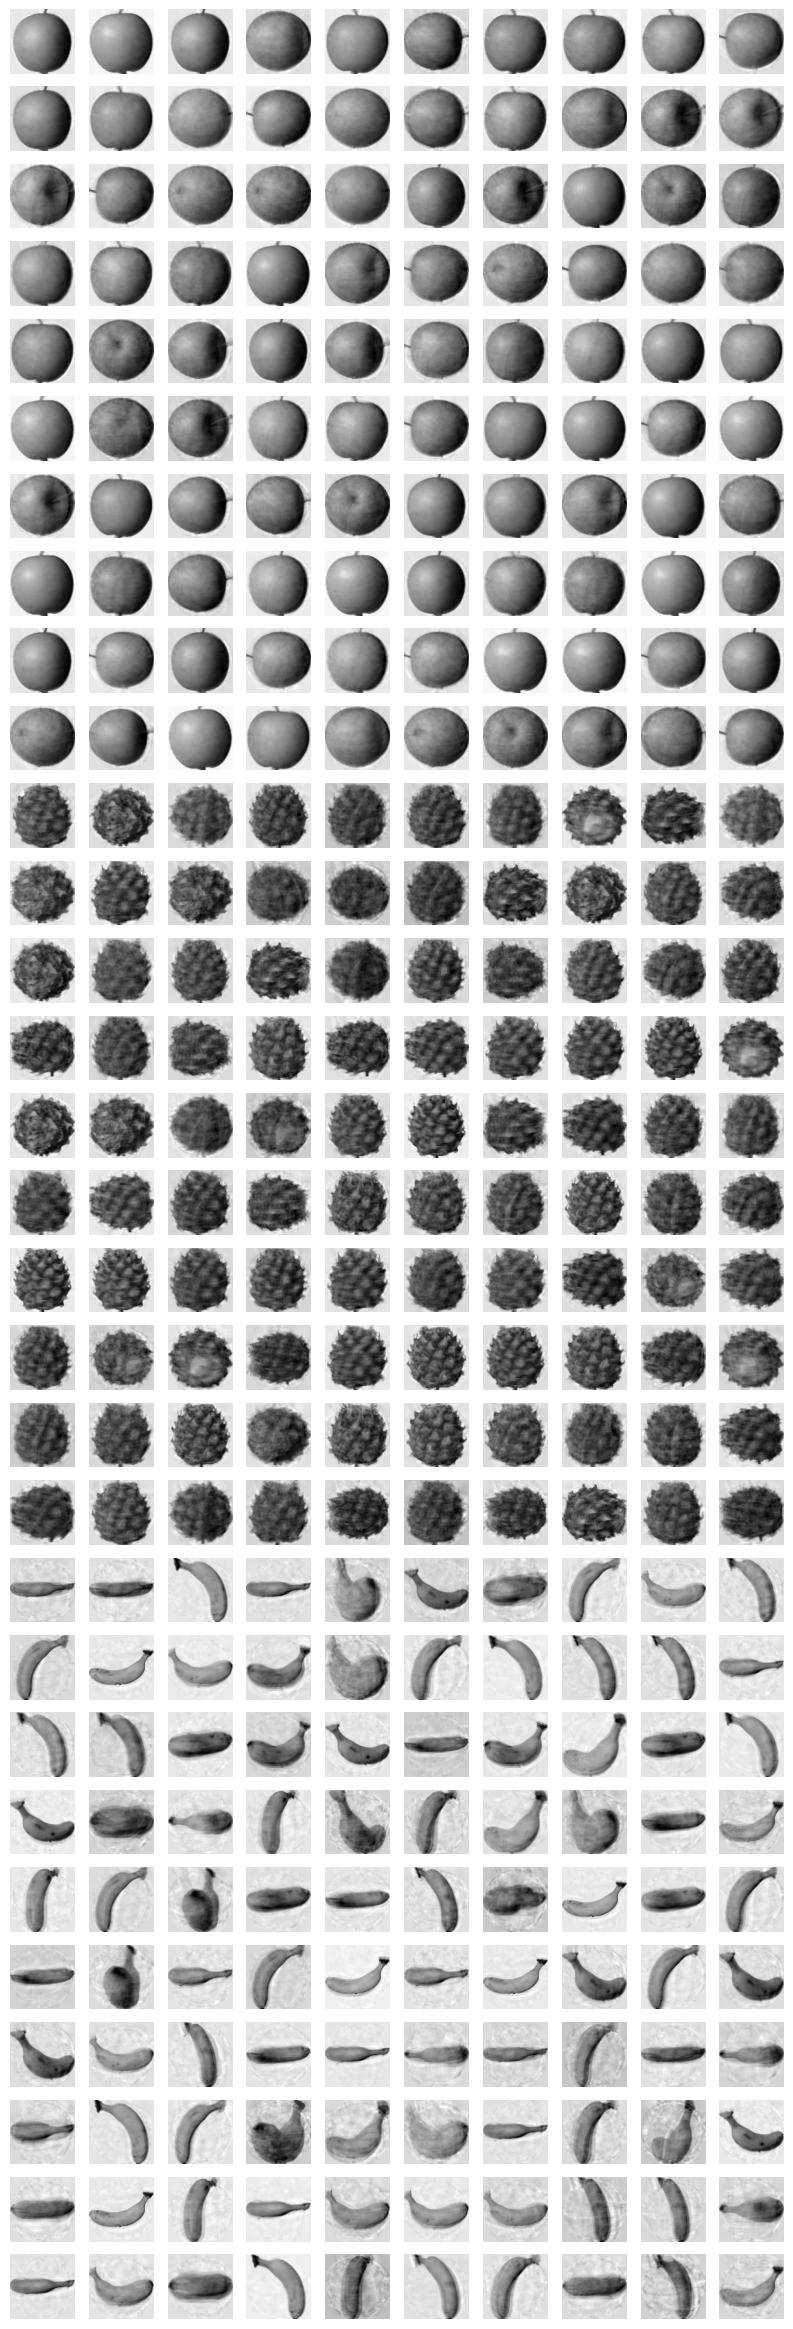

In [ ]:
# 복구한 데이터로 시각화
draw_fruits(fruits_inverse.reshape(-1, 100, 100))
# 실제 원본 데이터에 비해 노이즈가 생김.